In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
samples = torch.load("samples.pt").numpy()
np.random.seed(0)
np.random.shuffle(samples)

In [3]:
QUBITS_MAPPING = {
    0: 4,
    1: 2,
    2: 1,
    3: 7,
    4: 5,
    5: 0,
    6: 8,
    7: 6,
    8: 3,
}
def plot_image_grid(image_list: np.array,
                    rows: int=6,
                    cols: int=5,
                    figsize: tuple=(5, 7),
                    title: dict = None,
                    filename: str = "samples.png"
                    ):
    """
    plot image grid
    """
    samples = image_list[:cols * rows]
    samples_to_plot = []
    for sample in samples:
        sample_to_plot = []
        for i in range(9):
            sample_to_plot.append(sample[QUBITS_MAPPING[i]])
        samples_to_plot.append(np.array(sample_to_plot).reshape(3, 3))
    # print(samples_to_plot.shape)
    samples_to_plot = np.transpose(samples_to_plot, axes=(0, 2, 1))
    assert len(samples_to_plot) > 0, "Received empty image list."
    if title is None:
        title = {}
        title['text'] = f"{len(samples_to_plot)} base image({rows}x{cols} grid)"
        title['fontsize'] = 12
        title['y'] = 0.99
    if len(title) == 0:
        title = {}
        title['text'] = ""
        title['fontsize'] = 12
        title['y'] = 0.99
    if type(title) is str:
        temp = title
        title = {}
        title['text'] = temp
        title['fontsize'] = 12
        title['y'] = 0.99
    fig, axes = plt.subplots(rows, cols, figsize=figsize) 
    fig.suptitle(title['text'], fontsize=title['fontsize'], y=title['y']) 
    for index, single_image_data in enumerate(samples_to_plot):
        if index >= rows * cols: 
            break
        row_idx = index // cols
        col_idx = index % cols       
        ax = axes[row_idx, col_idx]
        img_array = np.array(single_image_data)
        ax.imshow(img_array, cmap='binary', vmin=0, vmax=1) 
        ax.set_xticks([])  
        ax.set_yticks([])  
    for i in range(len(samples_to_plot), rows * cols):
        row_idx = i // cols
        col_idx = i % cols
        if rows > 1 or cols > 1 : 
            fig.delaxes(axes[row_idx,col_idx])
        else: 
            fig.delaxes(axes[i])
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # 调整布局以适应主标题
    plt.savefig(filename, dpi=300)
    plt.show()

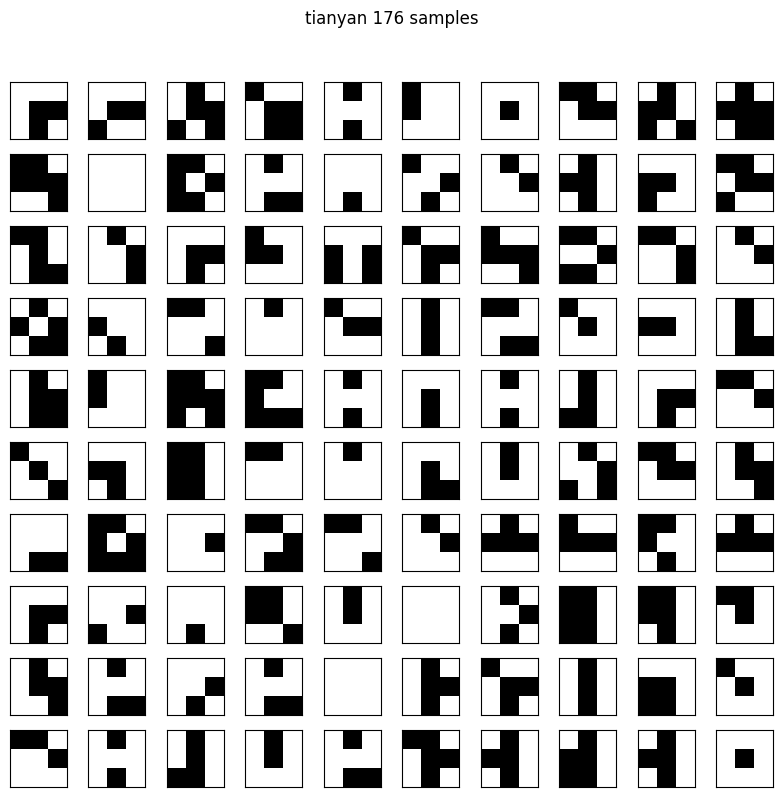

In [8]:
plot_image_grid(samples, rows=10, cols=10, figsize=(8, 8),title="tianyan 176 samples", filename="samples.png")